In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Serif'

In [3]:
def point_distance(x, y):
    l=[]
    for i in range(1, len(x)):
        dx = x[i] - x[i-1]
        dy = y[i] - y[i-1]
        l.append(np.sqrt(dx**2 + dy**2))
    return l

In [4]:
def point_distance_print_time(x, y, v):
    dl=[]
    dt=[]
    t=[]
    t.append(0)
    tmp=0.0
    for i in range(1, len(x)):
        dx = x[i] - x[i-1]
        dy = y[i] - y[i-1]
        dl_i=np.sqrt(dx**2 + dy**2)
        dt_i=dl_i/v
        tmp=tmp+dt_i
        dl.append(dl_i)
        dt.append(dt_i)
        t.append(tmp)
    return dl, dt, t

In [5]:
# get multi-layer path
def create_multilayer_path(x, y, t, z0, dz, dt_between_layers, n_layer):
    z_init=np.full(shape=len(t_onelayer), fill_value=z0)
    x_full=[]
    y_full=[]
    z_full=[]
    t_full=[]
    for n in range(0, n_layer):
        # get z for this layer
        z=z_init+dz*n
        x_full=np.append(x_full, x)
        y_full=np.append(y_full, y)
        z_full=np.append(z_full, z)
        if len(t_full)==0:
            t_full=np.append(t_full, t)
        else:
            t_full=np.append(t_full, t_full[-1]+ dt_between_layers+t)
        
#         if n < n_layer-1:
#             # add one step between layers to move to the center
#             x_full=np.append(x_full, x[0])
#             y_full=np.append(y_full, y[0])
#             z_full=np.append(z_full, z[0]+dz)
#             t_full=np.append(t_full, t_full[-1]+ dt_between_layers)

        
    return x_full, y_full, z_full, t_full
        
 

In [6]:
# Archimedean spiral (2D)

# r = a + b * theta^(1/c)

a = 0
# b = 0.33
b = 0.33
c = 1
k = 8 # length of one segment approximately = b*k

# printing speed
v=8.0 #[mm/s]
# v=18.0 #[mm/s]

# number of segments
N = np.arange(1, 60)

theta = np.sqrt(2)*np.sqrt(-1.0+ np.sqrt(1.0+ (k*k)*N**2))
                        

r = a + b*np.power(theta, 1.0/c)


# x and y coordinates
x = r*np.cos(theta)
y = r*np.sin(theta)

l=point_distance(x,y)

dl, dt, t_onelayer = point_distance_print_time(x,y,v)
print("Mean step lengh = " + str(np.mean(dl)) + " [mm]")
print("Time to print over one segment = " + str(np.mean(dt)) + " [s]")



# Get coordinate/time data for one layer: (x, y, t_onelayer)
# data=np.vstack((x, y, t_onelayer)).T

# print(data)

# z = 5.0 + (t/t_onelayer).astype(int)*z_increase



# z=np.full(shape=len(t_onelayer), fill_value=5.0)
# z=z+0.25
# print(z)
# for n in range(1,5):
#     print(n)

Mean step lengh = 2.61316138277784 [mm]
Time to print over one segment = 0.32664517284723 [s]


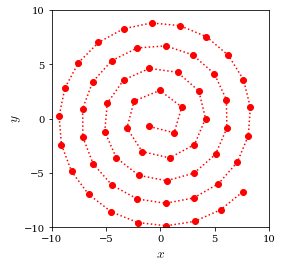

In [7]:
# %matplotlib qt
%matplotlib inline
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x,y,z, '-or')
plt.plot(x,y, ':or')
# plt.axis('equal')
plt.axis([-10, 10, -10, 10])
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-10, -5, 0, 5, 10])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("$x$", usetex=True, fontsize = 14)
plt.ylabel("$y$", usetex=True,fontsize = 14)


# fig.savefig('printing_path_2D.pdf', bbox_inches='tight')

# show the plot
plt.show()

In [8]:
z0 = 6.0 # initlal z
dz = 3 # z step size
dt = 0.1 # = time step size: take one time step to move to the center
n_layer = 6

x_full, y_full, z_full, t_full = create_multilayer_path(x,y, t_onelayer, z0, dz, dt, n_layer)

In [9]:
# data=np.vstack((x_full, y_full, z_full, t_full)).T
# print(data)
# print(z_full)

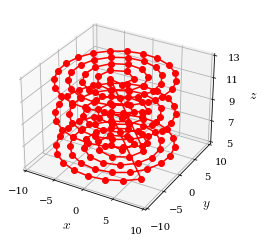

In [10]:
# %matplotlib qt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_full,y_full,z_full, '-or')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([5, 11])
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])
ax.set_zticks([5, 7, 9, 11, 13, 15, 17, 19, 21, 23])
ax.set_xlabel("$x$", usetex=True, fontsize = 14)
ax.set_ylabel("$y$", usetex=True,fontsize = 14)
ax.set_zlabel("$z$", usetex=True,fontsize = 14)

# fig.tight_layout()
# fig.savefig('printing_path_3layers.pdf', bbox_inches='tight')

# show the plot
plt.show()

In [11]:
xt_data=np.vstack((t_full, x_full)).T
xt_df=pd.DataFrame(xt_data)

yt_data=np.vstack((t_full, y_full)).T
yt_df=pd.DataFrame(yt_data)

zt_data=np.vstack((t_full, z_full)).T
zt_df=pd.DataFrame(zt_data)

In [12]:
# xt_df.to_csv('path_eq_t_x_coarse.csv', index=False, header=False)
# yt_df.to_csv('path_eq_t_y_coarse.csv', index=False, header=False)
# zt_df.to_csv('path_eq_t_z_coarse.csv', index=False, header=False)

In [13]:
# xt_df.to_csv('./../Additive_Manufacturing/input_mat_params/path_eq_t_x_coarse.csv', index=False, header=False)
# yt_df.to_csv('./../Additive_Manufacturing/input_mat_params/path_eq_t_y_coarse.csv', index=False, header=False)
# zt_df.to_csv('./../Additive_Manufacturing/input_mat_params/path_eq_t_z_coarse.csv', index=False, header=False)